<a href="https://colab.research.google.com/github/ifs55/Atividade-com-OpenCV/blob/main/Quest%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1

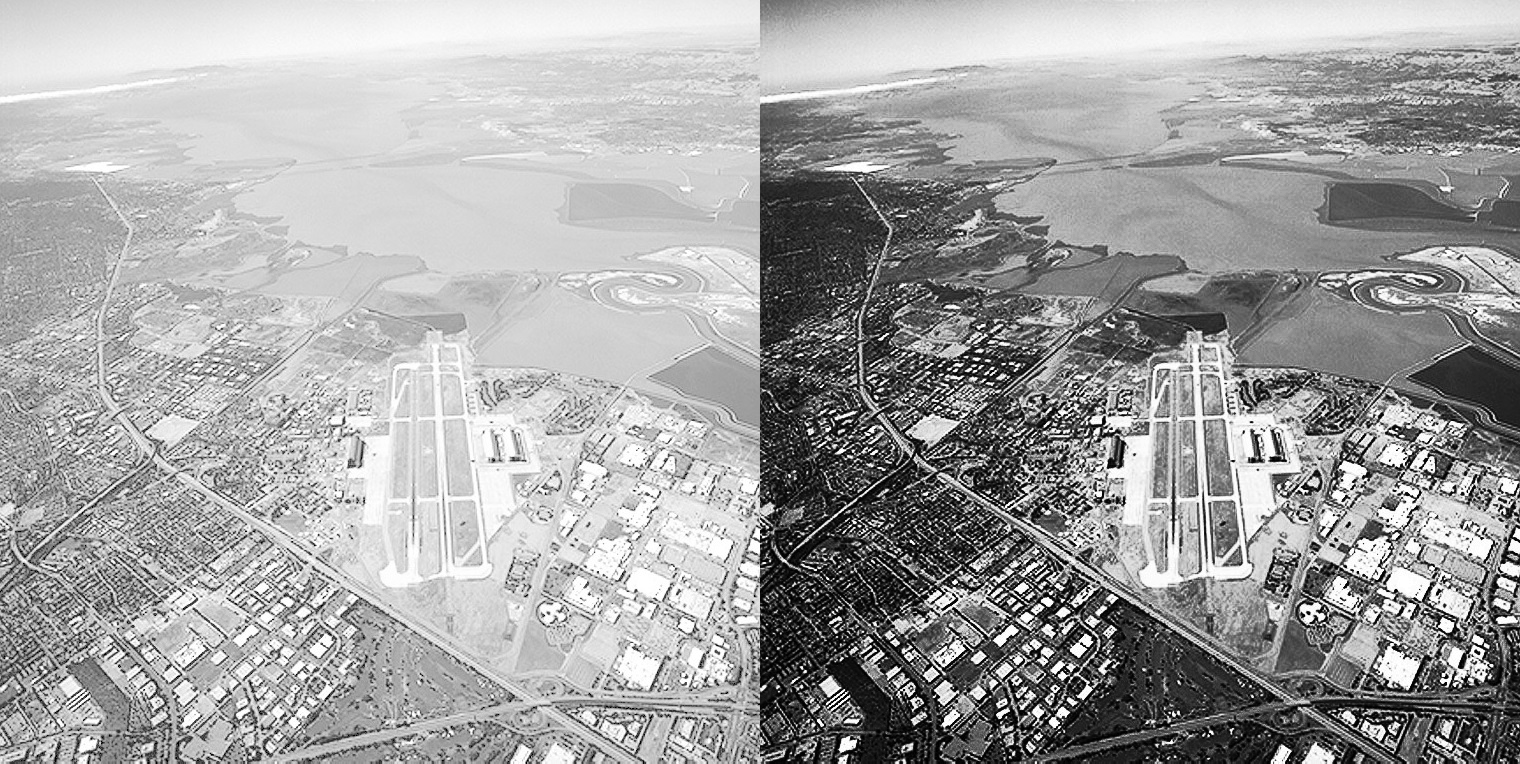

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
#adicionar caminho da imagem
imagem = cv2.imread('/content/Imagem Questão 1.png', 0)
equalização = cv2.equalizeHist(imagem)
res = np.hstack((imagem, equalização))
cv2_imshow(res)

Questão 2

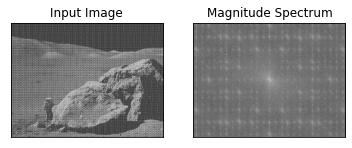

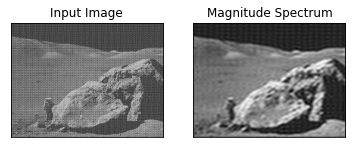

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/Imagem Questão 2.tif',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Questão 3

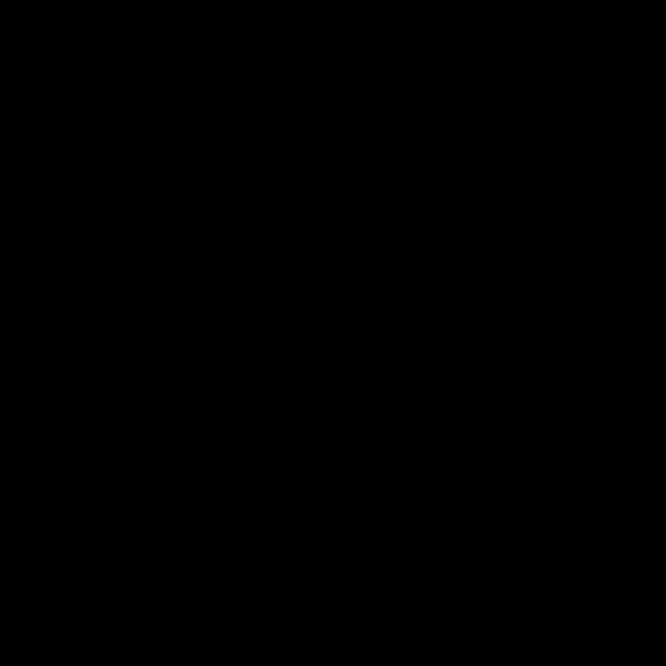

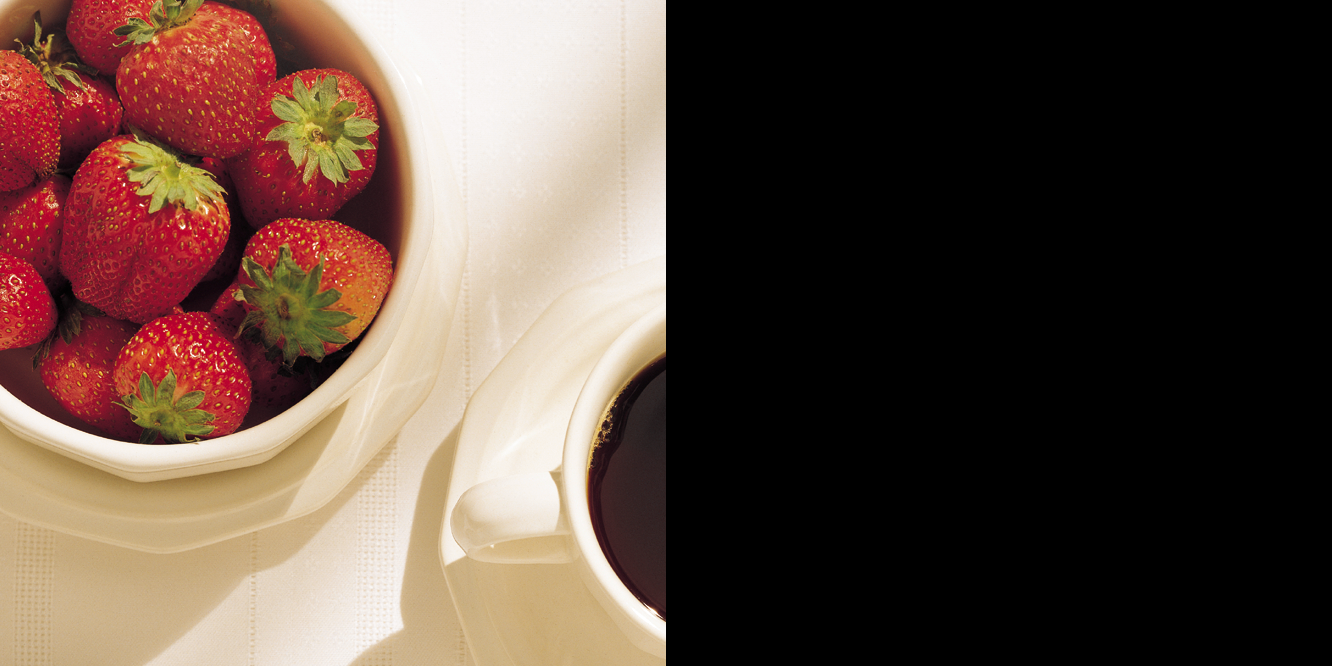

-1

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/Imagem Questão 3.tif')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
blur = cv2.medianBlur(hsv ,7)

lower = np.array([0,0,255])
upper = np.array([0,0,255])

mask = cv2.inRange(blur, lower, upper)
res = cv2.bitwise_and(image,image, mask= mask)            

cv2_imshow(mask)
cv2_imshow(np.hstack([image, res]))
cv2.waitKey(0)